In [109]:
from enum import Enum
from pprint import pprint
import requests


class Resource(Enum):
    ENERGY = "energy"
    COAL = "coal"
    URANIUM = "uranium"
    BIOMASS = "biomass"
    GAS = "gas"
    OIL = "oil"


class PowerPlant(Enum):
    COAL = "coal"
    URANIUM = "uranium"
    BIOMASS = "biomass"
    GAS = "gas"
    OIL = "oil"
    GEOTHERMAL = "geothermal"
    WIND = "wind"
    SOLAR = "solar"
    HYDRO = "hydro"


class OrderSide(Enum):
    BUY = "buy"
    SELL = "sell"


class AlgotradeApi:
    def __init__(self, url, team_secret, game_id=None, player_id=None):
        self.team_secret = team_secret
        self.URL = url

        self.team_secret = team_secret
        self.game_id = game_id
        self.player_id = player_id

    def set_url(self, new_URL):
        self.URL = new_URL

    def set_team_secret(self, new_team_secret):
        self.team_secret = new_team_secret

    def set_game_id(self, new_game_id):
        self.game_id = new_game_id

    def set_player_id(self, new_player_id):
        self.player_id = new_player_id

    def get_games(self):
        return requests.get(
            f"{self.URL}/game/list", params={"team_secret": self.team_secret}
        )

    def get_game(self):
        return requests.get(
            f"{self.URL}/game/{self.game_id}", params={"team_secret": self.team_secret}
        )

    def get_players(self):
        return requests.get(
            f"{self.URL}/game/{self.game_id}/player/list",
            params={"team_secret": self.team_secret},
        )

    def create_player(self, player_name: str = None):
        return requests.post(
            f"{self.URL}/game/{self.game_id}/player/create",
            params={"team_secret": self.team_secret},
            json={"player_name": player_name},
        )

    def reset_player(self):
        return requests.get(
            f"{self.URL}/game/{self.game_id}/player/{self.player_id}/reset",
            params={"team_secret": self.team_secret},
        )

    def get_player(self):
        return requests.get(
            f"{self.URL}/game/{self.game_id}/player/{self.player_id}",
            params={"team_secret": self.team_secret},
        )

    def delete_player(self):
        return requests.get(
            f"{self.URL}/game/{self.game_id}/player/{self.player_id}/delete",
            params={"team_secret": self.team_secret},
        )

    def get_orders(self, restriction=None):
        """get orders from ALL players, ex. restriction = all (default), bot, best"""
        return requests.get(
            f"{self.URL}/game/{self.game_id}/orders",
            params={"team_secret": self.team_secret, "restriction": restriction},
        )

    def get_player_orders(self):
        return requests.get(
            f"{self.URL}/game/{self.game_id}/player/{self.player_id}/orders",
            params={"team_secret": self.team_secret},
        )

    def get_prices(self, start_tick=None, end_tick=None, resource=None):
        url = f"{self.URL}/game/{self.game_id}/market/prices"
        params = {"team_secret": self.team_secret}
        if start_tick:
            params["start_tick"] = start_tick
        if end_tick:
            params["end_tick"] = end_tick
        if resource:
            params["resource"] = resource
        return requests.get(url, params=params)

    def set_energy_price(self, price):
        return requests.post(
            f"{self.URL}/game/{self.game_id}/player/{self.player_id}/energy/set_price",
            params={"team_secret": self.team_secret},
            json={"price": price},
        )

    def create_order(
        self, resource, price, size, side, expiration_tick=None, expiration_length=None
    ):
        body = {
            "resource": resource,
            "price": price,
            "size": size,
            "expiration_tick": expiration_tick,
            "expiration_length": expiration_length,
            "side": side,
        }
        return requests.post(
            f"{self.URL}/game/{self.game_id}/player/{self.player_id}/orders/create",
            params={"team_secret": self.team_secret},
            json=body,
        )

    def cancel_order(self, id):
        return requests.get(
            f"{self.URL}/game/{self.game_id}/player/{self.player_id}/orders/{id}/cancel",
            params={"team_secret": self.team_secret},
        )

    def get_trades(self, start_tick=None, end_tick=None, resource=None):
        url = f"{self.URL}/game/{self.game_id}/player/{self.player_id}/trades"
        params = {"team_secret": self.team_secret}
        if start_tick:
            params["start_tick"] = start_tick
        if end_tick:
            params["end_tick"] = end_tick
        params["resource"] = resource
        return requests.get(url, params=params)

    def get_plants(self):
        return requests.get(
            f"{self.URL}/game/{self.game_id}/player/{self.player_id}/plant/list",
            params={"team_secret": self.team_secret},
        )

    def get_plant_prices(self):
        return requests.get(
            f"{self.URL}/game/{self.game_id}/player/{self.player_id}/plant/list",
            params={"team_secret": self.team_secret},
        )

    def buy_plant(self, type):
        return requests.post(
            f"{self.URL}/game/{self.game_id}/player/{self.player_id}/plant/buy",
            params={"team_secret": self.team_secret},
            json={"type": type},
        )

    def sell_plant(self, type):
        return requests.post(
            f"{self.URL}/game/{self.game_id}/player/{self.player_id}/plant/sell",
            params={"team_secret": self.team_secret},
            json={"type": type},
        )

    def turn_on(self, plant_type, number):
        """turn_on(plant_type, 0) turns off all plants of that type"""
        return requests.post(
            f"{self.URL}/game/{self.game_id}/player/{self.player_id}/plant/on",
            params={"team_secret": self.team_secret},
            json={"type": plant_type, "number": number},
        )

    def get_dataset(self, start_tick=None, end_tick=None):
        url = f"{self.URL}/game/{self.game_id}/dataset"
        params = {"team_secret": self.team_secret}
        if start_tick:
            params["start_tick"] = start_tick
        if end_tick:
            params["end_tick"] = end_tick
        return requests.get(url, params=params)

In [110]:
url = "https://algotrade-server.xfer.hr"  # Change this
team_secret = "9EJ6MAV3N5"  # Change this


api = AlgotradeApi(url, team_secret)

In [111]:
api.set_game_id("01HV9TVC9RK5T0ZV2YJ3AQKQ9R")

In [112]:
r = api.get_prices(start_tick=1, end_tick=99, resource=Resource.ENERGY.value)

In [113]:
data = []

for i in range(0, 1493 - 100, 100):
    r = api.get_dataset(start_tick=i, end_tick=i+100)
    if r.status_code != 200:
        print(r.status_code)
        break
    data.extend(r.json().values())

400


In [114]:
api.get_dataset().json()

{'312': {'tick': 312,
  'date': '2011-11-21T05:30:00',
  'resource_prices': {'coal': 20326,
   'uranium': 93015,
   'biomass': 68678,
   'gas': 54367,
   'oil': 57818},
  'power_plants_output': {'coal': 113,
   'uranium': 1491,
   'biomass': 130,
   'gas': 304,
   'oil': 384,
   'geothermal': 63,
   'wind': 8,
   'solar': 0,
   'hydro': 124},
  'energy_demand': 23274,
  'max_energy_price': 610}}

In [115]:
data

[{'tick': 100,
  'date': '2011-11-12T09:30:00',
  'resource_prices': {'coal': 20199,
   'uranium': 126997,
   'biomass': 31092,
   'gas': 56520,
   'oil': 57674},
  'power_plants_output': {'coal': 112,
   'uranium': 1481,
   'biomass': 129,
   'gas': 297,
   'oil': 377,
   'geothermal': 27,
   'wind': 8,
   'solar': 0,
   'hydro': 114},
  'energy_demand': 27420,
  'max_energy_price': 530},
 {'tick': 100,
  'date': '2011-11-12T09:30:00',
  'resource_prices': {'coal': 20199,
   'uranium': 126997,
   'biomass': 31092,
   'gas': 56520,
   'oil': 57674},
  'power_plants_output': {'coal': 112,
   'uranium': 1481,
   'biomass': 129,
   'gas': 297,
   'oil': 377,
   'geothermal': 27,
   'wind': 8,
   'solar': 0,
   'hydro': 114},
  'energy_demand': 27420,
  'max_energy_price': 530},
 {'tick': 101,
  'date': '2011-11-12T10:30:00',
  'resource_prices': {'coal': 20199,
   'uranium': 127013,
   'biomass': 31047,
   'gas': 56485,
   'oil': 57673},
  'power_plants_output': {'coal': 112,
   'uranium'

In [116]:
import pandas as pd

data2 = []
for d in data:
    x = {}
    for k, v in d.items():
        if isinstance(v, dict):
            for kk, vv in v.items():
                x[f"{k}_{kk}"] = vv
        else:
            x[k] = v

    data2.append(x)

df = pd.DataFrame(data2)
df.to_csv("dataset.csv", index=False)

In [117]:
df

,tick,date,resource_prices_coal,resource_prices_uranium,resource_prices_biomass,resource_prices_gas,resource_prices_oil,power_plants_output_coal,power_plants_output_uranium,power_plants_output_biomass,power_plants_output_gas,power_plants_output_oil,power_plants_output_geothermal,power_plants_output_wind,power_plants_output_solar,power_plants_output_hydro,energy_demand,max_energy_price
0,100,2011-11-12T09:30:00,20199,126997,31092,56520,57674,112,1481,129,297,377,27,8,0,114,27420,530
1,100,2011-11-12T09:30:00,20199,126997,31092,56520,57674,112,1481,129,297,377,27,8,0,114,27420,530
2,101,2011-11-12T10:30:00,20199,127013,31047,56485,57673,112,1481,129,297,377,27,8,0,113,27961,521
3,102,2011-11-12T11:30:00,20200,127028,31002,56451,57673,112,1481,129,297,377,24,8,0,114,27889,522
4,103,2011-11-12T12:30:00,20200,127044,30957,56416,57672,112,1481,129,297,377,24,8,0,114,27762,524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,296,2011-11-20T13:30:00,20316,92809,70259,53994,57728,113,1481,130,304,385,54,8,6,129,26122,552
199,297,2011-11-20T14:30:00,20316,92687,70242,54020,57729,113,1481,130,304,385,54,8,10,130,26158,551
200,298,2011-11-20T15:30:00,20317,92566,70226,54047,57730,113,1482,130,304,385,54,8,33,130,26284,549
201,299,2011-11-20T16:30:00,20317,92445,70210,54073,57730,113,1483,130,304,385,54,8,44,129,26699,542


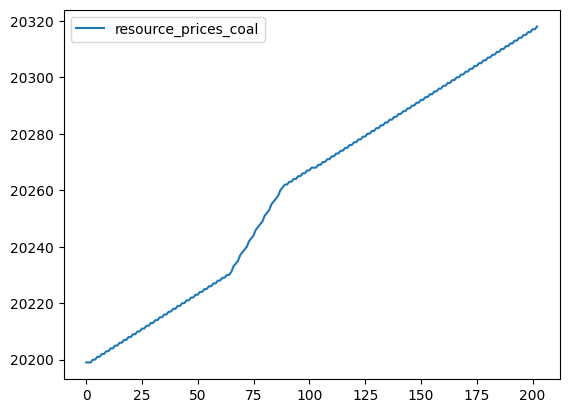

In [118]:
import matplotlib.pyplot as plt
# df.max_energy_price.plot()
df.resource_prices_coal.plot()
# df.resource_prices_gas.plot()
# df.resource_prices_oil.plot()
# df.resource_prices_uranium.plot()
plt.legend()

<Axes: >

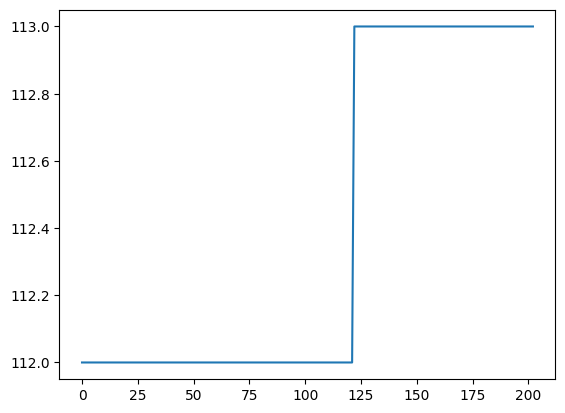

In [119]:
df.power_plants_output_coal.plot()

<Axes: >

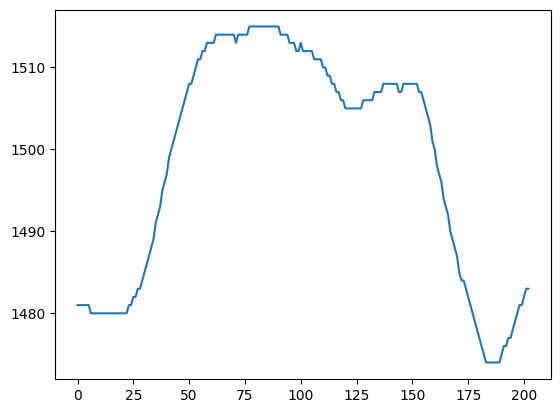

In [120]:
df.power_plants_output_uranium.plot()

<Axes: >

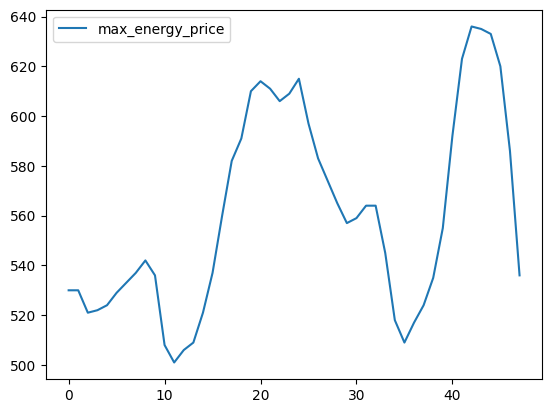

In [121]:
df[["date", "max_energy_price"]][:48].plot()

In [122]:
df[:10]

,tick,date,resource_prices_coal,resource_prices_uranium,resource_prices_biomass,resource_prices_gas,resource_prices_oil,power_plants_output_coal,power_plants_output_uranium,power_plants_output_biomass,power_plants_output_gas,power_plants_output_oil,power_plants_output_geothermal,power_plants_output_wind,power_plants_output_solar,power_plants_output_hydro,energy_demand,max_energy_price
0,100,2011-11-12T09:30:00,20199,126997,31092,56520,57674,112,1481,129,297,377,27,8,0,114,27420,530
1,100,2011-11-12T09:30:00,20199,126997,31092,56520,57674,112,1481,129,297,377,27,8,0,114,27420,530
2,101,2011-11-12T10:30:00,20199,127013,31047,56485,57673,112,1481,129,297,377,27,8,0,113,27961,521
3,102,2011-11-12T11:30:00,20200,127028,31002,56451,57673,112,1481,129,297,377,24,8,0,114,27889,522
4,103,2011-11-12T12:30:00,20200,127044,30957,56416,57672,112,1481,129,297,377,24,8,0,114,27762,524
5,104,2011-11-12T13:30:00,20201,127059,30911,56381,57671,112,1481,129,297,377,24,9,33,114,27474,529
6,105,2011-11-12T14:30:00,20201,127075,30866,56346,57670,112,1480,129,297,377,24,10,95,113,27204,533
7,106,2011-11-12T15:30:00,20202,127091,30821,56312,57669,112,1480,129,297,377,24,13,181,114,27005,537
8,107,2011-11-12T16:30:00,20202,127106,30776,56277,57668,112,1480,129,298,377,24,15,247,114,26681,542
9,108,2011-11-12T17:30:00,20203,127122,30731,56242,57668,112,1480,129,298,378,24,16,284,114,27059,536


In [123]:
api.get_orders(restriction='best').json()

{'gas': {'buy': [{'order_id': '01HV9VQYD8QP78XJ2Z2YFJSF15',
    'player_id': '01HV9VADH3T3C115TT6F81M6Q3',
    'price': 54449,
    'size': 12,
    'tick': 312,
    'timestamp': '2024-04-12T19:14:55.528247',
    'order_side': 'buy',
    'order_status': 'active',
    'filled_size': 0,
    'expiration_tick': 316}],
  'sell': [{'order_id': '01HV9VQYD8P24YAFMP3D3JXCC8',
    'player_id': '01HV9VADH3T3C115TT6F81M6Q3',
    'price': 54450,
    'size': 100,
    'tick': 312,
    'timestamp': '2024-04-12T19:14:55.528506',
    'order_side': 'sell',
    'order_status': 'active',
    'filled_size': 0,
    'expiration_tick': 316}]},
 'coal': {'buy': [{'order_id': '01HV9VQYCYP4NR6GMJ78719G1M',
    'player_id': '01HV9VADH3T3C115TT6F81M6Q3',
    'price': 20424,
    'size': 12,
    'tick': 312,
    'timestamp': '2024-04-12T19:14:55.518774',
    'order_side': 'buy',
    'order_status': 'active',
    'filled_size': 0,
    'expiration_tick': 316}],
  'sell': [{'order_id': '01HV9VQYCZXYSGDQBQ4ARERQ90',
    'p

In [124]:
api.set_player_id("01HV9TYFMCM81HR7PERFTC0YT5")
api.get_plants().json()

{'power_plants_powered': {'coal': 0,
  'uranium': 0,
  'biomass': 0,
  'gas': 1,
  'oil': 0,
  'geothermal': 0,
  'wind': 0,
  'solar': 0,
  'hydro': 0},
 'power_plants_owned': {'coal': 0,
  'uranium': 0,
  'biomass': 0,
  'gas': 1,
  'oil': 0,
  'geothermal': 0,
  'wind': 0,
  'solar': 0,
  'hydro': 0},
 'buy_price': {'coal': 3025000,
  'uranium': 97500000,
  'biomass': 9680000,
  'gas': 10965520,
  'oil': 9680000,
  'geothermal': 4000000,
  'wind': 2000000,
  'solar': 1000000,
  'hydro': 12007999},
 'sell_price': {'coal': 1969275,
  'uranium': 63472500,
  'biomass': 6301680,
  'gas': 6792800,
  'oil': 6301680,
  'geothermal': 2604000,
  'wind': 1302000,
  'solar': 651000,
  'hydro': 7817207}}

In [125]:
api.get_plant_prices().json()

{'power_plants_powered': {'coal': 0,
  'uranium': 0,
  'biomass': 0,
  'gas': 1,
  'oil': 0,
  'geothermal': 0,
  'wind': 0,
  'solar': 0,
  'hydro': 0},
 'power_plants_owned': {'coal': 0,
  'uranium': 0,
  'biomass': 0,
  'gas': 1,
  'oil': 0,
  'geothermal': 0,
  'wind': 0,
  'solar': 0,
  'hydro': 0},
 'buy_price': {'coal': 3025000,
  'uranium': 97500000,
  'biomass': 9680000,
  'gas': 10965520,
  'oil': 9680000,
  'geothermal': 4000000,
  'wind': 2000000,
  'solar': 1000000,
  'hydro': 12007999},
 'sell_price': {'coal': 1969275,
  'uranium': 63472500,
  'biomass': 6301680,
  'gas': 6792800,
  'oil': 6301680,
  'geothermal': 2604000,
  'wind': 1302000,
  'solar': 651000,
  'hydro': 7817207}}